## Question 3(i)(ii)

### Import Libraries

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, LeakyReLU
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
plt.rc('font', size=18)
plt.rcParams['figure.constrained_layout.use'] = True
import sys
from sklearn.dummy import DummyClassifier
import warnings
warnings.filterwarnings("ignore")
import time
import pandas as pd

### Setting the model parameter like shape of input image and number of labels in CIFAR Dataset

In [2]:
num_classes = 10
input_shape = (32, 32, 3)

### Creating a function that takes train size as input and trains the model

In [3]:
def Create_Conv_Model(n = 5000) : 
    
    ### Loading the data and splitting data in train and test split. Also normalising the data
    
    # the data, split between train and test sets
    (x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
    x_train = x_train[1:n]; y_train=y_train[1:n]

    # Scale images to the [0, 1] range
    x_train = x_train.astype("float32") / 255
    x_test = x_test.astype("float32") / 255
    print("orig x_train shape:", x_train.shape)

    # convert class vectors to binary class matrices
    y_train = keras.utils.to_categorical(y_train, num_classes)
    y_test = keras.utils.to_categorical(y_test, num_classes)
    
    
    ### Setting the ConvNet parameters and Training the ConvNet model
    model_name = "cifar_" + str(n) + "_MaxPool.model"
    use_saved_model = False
    if use_saved_model:
        model = keras.models.load_model(model_name)
    else:
        model = keras.Sequential()
        
        model.add(Conv2D(16, (3,3), padding='same', input_shape=x_train.shape[1:],activation='relu'))
        
        #Removed Strides from here
        model.add(Conv2D(16, (3,3), padding='same', activation='relu'))
        #Adding Maxpool layer here
        model.add(MaxPooling2D(pool_size = (2, 2)))
        
        
        model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
        
        #Removed Strides from here
        model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
        #Adding Maxpool layer here
        model.add(MaxPooling2D(pool_size = (2, 2)))
        
        
        model.add(Dropout(0.5))
        model.add(Flatten())
        model.add(Dense(num_classes, activation='softmax',kernel_regularizer=regularizers.l1(0.0001)))
        model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"])
        model.summary()
        batch_size = 128
        epochs = 20
        
        ##Saving the time to train the CNN
        start_time = time.time()
        history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
        model.save(model_name)
        train_time = time.time() - start_time
        
        ### Plot of Model Accuracy Vs.Epochs
        plt.figure()
        plt.subplot(211)
        plt.plot(history.history['accuracy'])
        plt.plot(history.history['val_accuracy'])
        plt.title(f'model accuracy for training size {n} with Maxpool')
        plt.ylabel('accuracy')
        plt.xlabel('epoch')
        plt.legend(['train', 'val'], loc='upper left')
        
        
        ### Plot of Model Loss Vs.Epochs
        plt.figure()
        plt.subplot(212)
        plt.plot(history.history['loss'])
        plt.plot(history.history['val_loss'])
        plt.title(f'model loss for training size {n}  with Maxpool')
        plt.ylabel('loss'); plt.xlabel('epoch')
        plt.legend(['train', 'val'], loc='upper left')
        plt.show()
    
    
    ### Testing model accuracy on Train Data
    preds_train = model.predict(x_train)
    y_pred_train = np.argmax(preds_train, axis=1)
    y_train1 = np.argmax(y_train, axis=1)
    print(f'Model Accuracy on Train Data for Training Size: {n}  with Maxpool')
    print(classification_report(y_train1, y_pred_train))
    print(confusion_matrix(y_train1, y_pred_train))
    
    
    ### Testing model accracy on Test data
    preds_test = model.predict(x_test)
    y_pred_test = np.argmax(preds_test, axis=1)
    y_test1 = np.argmax(y_test, axis=1)
    print(f'\n\nModel Accuracy on Test Data for Training Size: {n}  with Maxpool')
    print(classification_report(y_test1, y_pred_test))
    print(confusion_matrix(y_test1, y_pred_test))
    
    training_size_str = str(n)
    training_time_str = str(round(train_time, 2)) + ' seconds'
    accuracy_score_train = round(accuracy_score(y_train1, y_pred_train) * 100, 2)
    accuracy_score_train_str = str(accuracy_score_train) + '%'
    accuracy_score_test = round(accuracy_score(y_test1, y_pred_test) * 100, 2)
    accuracy_score_test_str = str(accuracy_score_test) + '%'
    
    
    CNN_model_Params_array = pd.array([training_size_str, training_time_str, accuracy_score_train_str, accuracy_score_test_str])
    
    return CNN_model_Params_array

### Trying above function for Training Size 5000

orig x_train shape: (4999, 32, 32, 3)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 16)        2320      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 16)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 32)        4640      
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)              

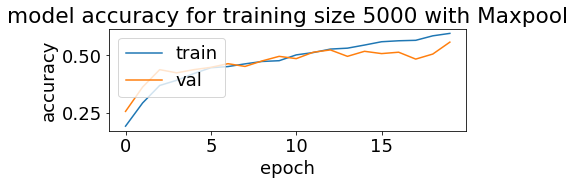

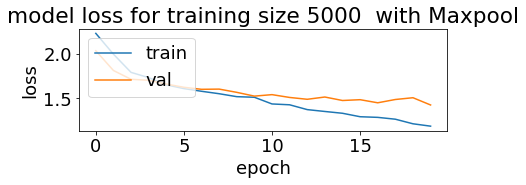

Model Accuracy on Train Data for Training Size: 5000  with Maxpool
              precision    recall  f1-score   support

           0       0.62      0.76      0.68       505
           1       0.64      0.82      0.72       460
           2       0.62      0.53      0.57       519
           3       0.68      0.40      0.50       486
           4       0.67      0.46      0.55       519
           5       0.72      0.55      0.62       488
           6       0.58      0.78      0.67       518
           7       0.61      0.77      0.68       486
           8       0.77      0.69      0.73       520
           9       0.70      0.75      0.72       498

    accuracy                           0.65      4999
   macro avg       0.66      0.65      0.64      4999
weighted avg       0.66      0.65      0.64      4999

[[384  23   8   2  10   1   3  11  48  15]
 [ 13 379   2   0   2   0   8   3  14  39]
 [ 46  14 273  15  30  16  56  47  11  11]
 [ 14  22  28 195  24  43  76  44   7  33]
 [

In [4]:
n = 5000
CNN_model_array_5K = Create_Conv_Model(n)


In [6]:

CNN_Models_DF = pd.DataFrame()

CNN_Models_DF = CNN_Models_DF.append(pd.DataFrame([CNN_model_array_5K], columns = ["Training Size", "Training Time", "Accuracy on Training Data", "Accuracy on Test Data"]), ignore_index = True)

CNN_Models_DF = CNN_Models_DF.style.set_properties(**{'text-align': 'center'})
display(CNN_Models_DF)


,Training Size,Training Time,Accuracy on Training Data,Accuracy on Test Data
0,5000,16.43 seconds,65.09%,52.67%
